In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# CorInfoMax

In [3]:
df_results = pd.read_pickle(r"../Results/simulation_results_CorInfoMax_CIFAR100_V2.pkl")
print(df_results.shape)
df_results.columns

(12, 7)


Index(['setting_number', 'seed', 'Model', 'Hyperparams', 'Trn_ACC_list',
       'Tst_ACC_list', 'forward_backward_weight_angle_list'],
      dtype='object')

In [4]:
df_results['Trn_ACC_list_top1'] = df_results.apply(lambda row: np.array(row['Trn_ACC_list'])[:,0], axis = 1)
df_results['Trn_ACC_list_top5'] = df_results.apply(lambda row: np.array(row['Trn_ACC_list'])[:,1], axis = 1)
df_results['Tst_ACC_list_top1'] = df_results.apply(lambda row: np.array(row['Tst_ACC_list'])[:,0], axis = 1)
df_results['Tst_ACC_list_top5'] = df_results.apply(lambda row: np.array(row['Tst_ACC_list'])[:,1], axis = 1)

df_results['Trn_ACC_top1'] = df_results.apply(lambda row: row['Trn_ACC_list_top1'][-1], axis = 1)
df_results['Trn_ACC_top5'] = df_results.apply(lambda row: row['Trn_ACC_list_top5'][-1], axis = 1)
df_results['Tst_ACC_top1'] = df_results.apply(lambda row: row['Tst_ACC_list_top1'][-1], axis = 1)
df_results['Tst_ACC_top5'] = df_results.apply(lambda row: row['Tst_ACC_list_top5'][-1], axis = 1)
df_results

,setting_number,seed,Model,Hyperparams,Trn_ACC_list,Tst_ACC_list,forward_backward_weight_angle_list,Trn_ACC_list_top1,Trn_ACC_list_top5,Tst_ACC_list_top1,Tst_ACC_list_top5,Trn_ACC_top1,Trn_ACC_top5,Tst_ACC_top1,Tst_ACC_top5
0,1,0,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.02794, 0.08994], [0.0455, 0.14472], [0.068...","[[0.0266, 0.0847], [0.044, 0.1459], [0.0676, 0...","[[90.03693389892578, 89.85598754882812], [90.0...","[0.02794, 0.0455, 0.06898, 0.09132, 0.10408, 0...","[0.08994, 0.14472, 0.1929, 0.22522, 0.24176, 0...","[0.0266, 0.044, 0.0676, 0.0901, 0.0992, 0.1113...","[0.0847, 0.1459, 0.1896, 0.2227, 0.2329, 0.256...",0.23992,0.40834,0.1909,0.3693
1,1,10,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.0368, 0.11108], [0.06154, 0.16726], [0.081...","[[0.035, 0.1117], [0.0591, 0.1677], [0.0799, 0...","[[89.94280242919922, 89.91393280029297], [89.9...","[0.0368, 0.06154, 0.08116, 0.10026, 0.11448, 0...","[0.11108, 0.16726, 0.20744, 0.23538, 0.25994, ...","[0.035, 0.0591, 0.0799, 0.0908, 0.106, 0.1184,...","[0.1117, 0.1677, 0.2029, 0.2236, 0.2477, 0.26,...",0.24450,0.41900,0.1919,0.3670
2,1,20,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.03178, 0.11244], [0.05928, 0.16088], [0.07...","[[0.0324, 0.1116], [0.0613, 0.1534], [0.0734, ...","[[90.04681396484375, 90.03373718261719], [90.0...","[0.03178, 0.05928, 0.07586, 0.09724, 0.10642, ...","[0.11244, 0.16088, 0.19682, 0.22898, 0.24326, ...","[0.0324, 0.0613, 0.0734, 0.0933, 0.0991, 0.115...","[0.1116, 0.1534, 0.1862, 0.2161, 0.2317, 0.256...",0.24092,0.41096,0.1947,0.3649
3,1,30,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.03732, 0.10972], [0.06062, 0.15732], [0.07...","[[0.0349, 0.1076], [0.0579, 0.1513], [0.0742, ...","[[90.0199203491211, 89.91790008544922], [89.98...","[0.03732, 0.06062, 0.0786, 0.09694, 0.10916, 0...","[0.10972, 0.15732, 0.20522, 0.22352, 0.241, 0....","[0.0349, 0.0579, 0.0742, 0.0911, 0.1005, 0.109...","[0.1076, 0.1513, 0.1951, 0.2174, 0.2318, 0.243...",0.23668,0.40726,0.1883,0.3623
4,1,40,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.03634, 0.10612], [0.05238, 0.13268], [0.06...","[[0.0348, 0.1008], [0.0507, 0.1271], [0.0624, ...","[[90.02214813232422, 90.030517578125], [89.991...","[0.03634, 0.05238, 0.0688, 0.08462, 0.1039, 0....","[0.10612, 0.13268, 0.17376, 0.20276, 0.2361, 0...","[0.0348, 0.0507, 0.0624, 0.0764, 0.0952, 0.103...","[0.1008, 0.1271, 0.1692, 0.1982, 0.229, 0.2399...",0.23998,0.40892,0.1932,0.3692
5,1,50,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.02958, 0.09742], [0.0513, 0.14232], [0.068...","[[0.0316, 0.096], [0.0511, 0.1392], [0.0635, 0...","[[90.08143615722656, 90.08147430419922], [90.0...","[0.02958, 0.0513, 0.06836, 0.08554, 0.103, 0.1...","[0.09742, 0.14232, 0.1726, 0.20674, 0.23588, 0...","[0.0316, 0.0511, 0.0635, 0.0775, 0.0927, 0.113...","[0.096, 0.1392, 0.1661, 0.2012, 0.227, 0.2493,...",0.23968,0.41520,0.1919,0.3706
6,1,60,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.02806, 0.0888], [0.05002, 0.14016], [0.061...","[[0.0264, 0.0823], [0.0509, 0.1378], [0.0628, ...","[[90.0504150390625, 90.02027130126953], [90.01...","[0.02806, 0.05002, 0.06168, 0.08276, 0.09784, ...","[0.0888, 0.14016, 0.17826, 0.2081, 0.2312, 0.2...","[0.0264, 0.0509, 0.0628, 0.0825, 0.0938, 0.101...","[0.0823, 0.1378, 0.1711, 0.1989, 0.2212, 0.232...",0.23414,0.40406,0.1901,0.3621
7,1,70,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': ...","[[0.03574, 0.11204], [0.06088, 0.15822], [0.07...","[[0.0362, 0.1068], [0.0608, 0.1504], [0.077, 0...","[[89.98892974853516, 89.99955749511719], [89.9...","[0.03574, 0.06088, 0.0797, 0.09686, 0.11452, 0...","[0.11204, 0.15822, 0.20286, 0.23552, 0.25574, ...","[0.0362, 0.0608, 0.077, 0.0927, 0.1105, 0.1153...","[0.1068, 0.1504, 0.1956, 0.2258, 0.2454, 0.262...",0.24154,0.40664,0.1916,0.3627
8,1,80,CorInfoMax,"{'lr_start': {'ff': [0.16, 0.13, 0.08], 'fb': 

In [6]:
df_setting = df_results[['setting_number', 'Trn_ACC_top1', 'Tst_ACC_top1', 'Trn_ACC_top5', 'Tst_ACC_top5']].groupby('setting_number').mean().reset_index()
df_setting[['Trn_ACC_std_top1', 'Tst_ACC_std_top1', 'Trn_ACC_std_top5', 'Tst_ACC_std_top5']] = df_results[['setting_number', 'Trn_ACC_top1', 'Tst_ACC_top1', 'Trn_ACC_top5', 'Tst_ACC_top5']].groupby('setting_number').std().reset_index()[['Trn_ACC_top1', 'Tst_ACC_top1', 'Trn_ACC_top5', 'Tst_ACC_top5']]
df_setting

,setting_number,Trn_ACC_top1,Tst_ACC_top1,Trn_ACC_top5,Tst_ACC_top5,Trn_ACC_std_top1,Tst_ACC_std_top1,Trn_ACC_std_top5,Tst_ACC_std_top5
0,1,0.23884,0.19055,0.409152,0.36414,0.004513,0.003147,0.005345,0.005225
1,2,0.24223,0.19150,0.413010,0.36760,0.002927,0.000707,0.009150,0.002546


In [7]:
best_setting = df_setting.iloc[df_setting['Trn_ACC_top1'].argmax()]['setting_number']
best_setting = 1

In [7]:
df_results.loc[df_results['setting_number'] == 1]['Hyperparams'].iloc[0]

{'lr_start': {'ff': array([0.16, 0.13, 0.08]),
  'fb': array([ nan, 0.06, 0.04])},
 'lr_decay_multiplier': 1.0,
 'neural_dynamic_iterations_free': 50,
 'neural_dynamic_iterations_nudged': 20,
 'neural_lr_rule': 'constant',
 'neural_lr': 0.06,
 'epsilon': 0.15,
 'lambda': 0.99999,
 'architecture': [3072, 2000, 1000, 100],
 'three_phase': False}

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


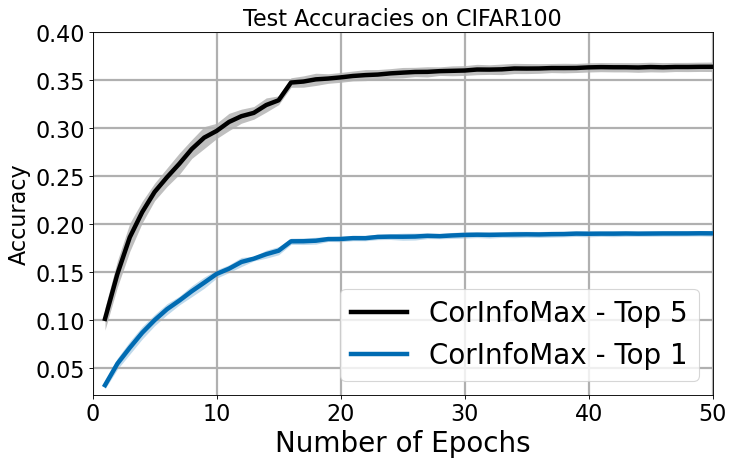

In [8]:
data_top1 = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list_top1'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_top5 = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Tst_ACC_list_top5'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_top1, perc_25_top1, perc_75_top1, std_data_top1 = perc(data_top1)
mean_top5, perc_25_top5, perc_75_top5, std_data_top5 = perc(data_top5)

x = np.arange(1, mean_top1.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(x, mean_top5, linewidth=4, color='k', label = "CorInfoMax - Top 5")
plt.fill_between(x, mean_top5 - std_data_top5, mean_top5 + std_data_top5, alpha=0.25, linewidth=0, color='k')

plt.plot(x, mean_top1, linewidth=4, color='#006BB2', label = "CorInfoMax - Top 1")
plt.fill_between(x, mean_top1 - std_data_top1, mean_top1 + std_data_top1, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Test Accuracies on CIFAR100")
plt.legend(fontsize = 25)
plt.axis([0.0,50,mean_top1[0] - 0.01,0.40])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxCIFAR100TestAccuracyComparison.pdf', format='pdf')

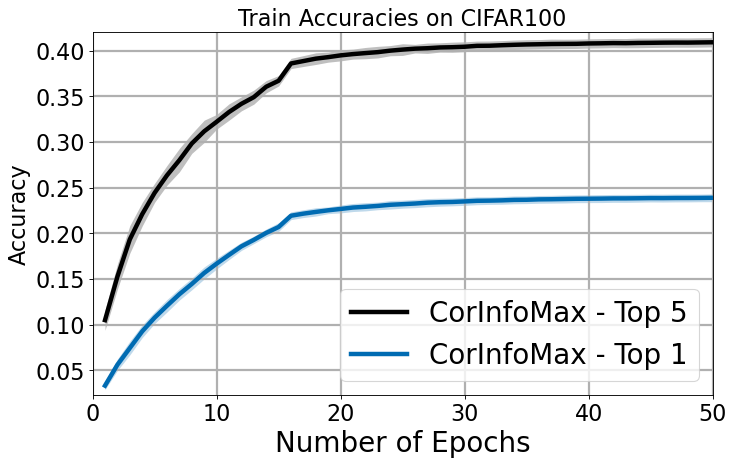

In [9]:
data_top1 = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Trn_ACC_list_top1'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
data_top5 = np.stack(df_results.loc[df_results["setting_number"] == best_setting]['Trn_ACC_list_top5'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)
# data = np.array(df_results.iloc[0]['Tst_ACC_list'])[np.newaxis]#.apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the mean, 25/75 percentiles, and standard deviation
mean_top1, perc_25_top1, perc_75_top1, std_data_top1 = perc(data_top1)
mean_top5, perc_25_top5, perc_75_top5, std_data_top5 = perc(data_top5)

x = np.arange(1, mean_top1.shape[0]+1)
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(x, mean_top5, linewidth=4, color='k', label = "CorInfoMax - Top 5")
plt.fill_between(x, mean_top5 - std_data_top5, mean_top5 + std_data_top5, alpha=0.25, linewidth=0, color='k')

plt.plot(x, mean_top1, linewidth=4, color='#006BB2', label = "CorInfoMax - Top 1")
plt.fill_between(x, mean_top1 - std_data_top1, mean_top1 + std_data_top1, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=25)
plt.xlabel(r"Number of Epochs",fontsize=25)
plt.title("Train Accuracies on CIFAR100")
plt.legend(fontsize = 25)
plt.axis([0.0,50,mean_top1[0] - 0.01,0.42])
ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMaxCIFAR100TrainAccuracyComparison.pdf', format='pdf')